> To live! like a tree alone and free,
> and like a forest in brotherhood/sisterhood...
> Nazim Hikmet

<center> <h1> Random Forests (Yes! No Forest Image) </h1> </center>



## Objectives

- Review of decision trees

- Defining Bootstrapping process

- Explaining the need for bootstrapping

- Identifying the need for bootstrapping for decision trees.

- Comparing Random forests and bagging methods

- Evaulating a model by random forest model

<center> <h1> Bootstrapping </h1> </center>

<img src= "img/bootstrapping2.jpg" style="height:400px">

Consider a case that we want to invest to either X or Y a fixed amount of money.

- $\alpha$ amount to X and $1- \alpha$ amount to Y

- We want to minimize variance in our investment! This is minimize $V(\alpha X + (1-\alpha )Y)$

- The $\alpha$ that minimizes the variance: 

$$ \alpha = \frac{\sigma^{2}_{Y} - \sigma_{XY}}{\sigma_{X}^{2} + \sigma^{2}_{Y} - 2\sigma_{XY}}$$

where $\sigma_{XY}$ is the covariance of X and Y. 

Q: Do you see the problem here?

Hint: Let's rewrite the equation with hats! What are the hats refering to ?


$$ \widehat{\alpha}= \frac{\widehat{\sigma}^{2}_{Y} - \widehat{\sigma}_{XY}}{\widehat{\sigma}_{X}^{2} + \widehat{\sigma}^{2}_{Y} - 2\widehat{\sigma}_{XY}}$$

Q: How much do we certain about $\widehat{\alpha}$?

In [2]:
import numpy as np 


In [8]:
a = (1.25-0.5)/(1+1.25-(2*.5))

In [9]:
a

0.6

In [10]:
sample = np.random.multivariate_normal(mean = [10,10], cov = [[1, 0.5], [0.5, 1.25]] , size = 100)


In [11]:
sigma_x = sample[:,0].var()

sigma_y = sample[:, 1].var()

sigma_xy = np.cov(sample.T)[0,1]

print(np.cov(sample.T))

alpha_hat = (sigma_y - sigma_xy)/(sigma_x + sigma_y - 2* sigma_xy)

print(alpha_hat)

[[0.88010585 0.26051477]
 [0.26051477 1.14967928]]
0.589649068936631


In [12]:
alphas = []

for i in range(1000):
    s = np.random.multivariate_normal(mean = [10,10], cov = [[1, 0.5], [0.5, 1.25]] , size = 100)
    s_x = s[:,0].var()
    s_y = s[:,1].var()
    s_xy = np.cov(s.T)[0,1]
    a_hat = (s_y - s_xy)/(s_x + s_y - 2* s_xy)
    alphas.append(a_hat)
    


In [13]:
import matplotlib.pyplot as plt

(array([  4.,  17.,  81., 178., 269., 262., 117.,  57.,  14.,   1.]),
 array([0.32473757, 0.38231762, 0.43989767, 0.49747772, 0.55505777,
        0.61263782, 0.67021787, 0.72779792, 0.78537797, 0.84295802,
        0.90053807]),
 <a list of 10 Patch objects>)

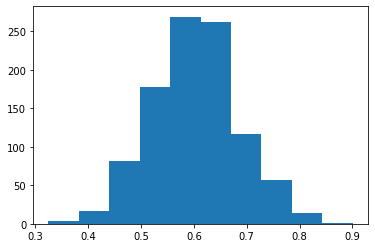

In [14]:
plt.hist(alphas)

In [16]:
np.std(alphas, ddof=1)

0.08235153240377377

In [ ]:
# find the mean of the alphas
# find the standard error of alphas - note that the degree of freedom is 1 in this case

Q: what is wrong with this approach?

A: What can we do about this -- Bootstapping 


In [20]:
## Bootstrapping

boot_sample = sample[np.random.choice(np.arange(100), replace = True, size = 100)]

np.unique(boot_sample, return_counts= True, axis = 0)[1]

## Homework: find alpha_hats with bootstrapping

array([2, 3, 2, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 4, 1, 2, 2, 1,
       2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 3, 1, 1, 2, 1],
      dtype=int64)

In [42]:
alphas = []

for i in range(1000):
    s = sample[np.random.choice(np.arange(100), replace = True, size = 100)]
    s_x = s[:,0].var()
    s_y = s[:,1].var()
    s_xy = np.cov(s.T)[0,1]
    a_hat = (s_y - s_xy)/(s_x + s_y - 2* s_xy)
    alphas.append(a_hat)
    

In [43]:
np.mean(alphas)

0.5898875760280629

In [44]:
np.std(alphas, ddof=1)

0.06155482090109765

(array([  1.,  15.,  54., 114., 230., 278., 191.,  91.,  17.,   9.]),
 array([0.3695387 , 0.41129044, 0.45304218, 0.49479392, 0.53654565,
        0.57829739, 0.62004913, 0.66180087, 0.70355261, 0.74530434,
        0.78705608]),
 <a list of 10 Patch objects>)

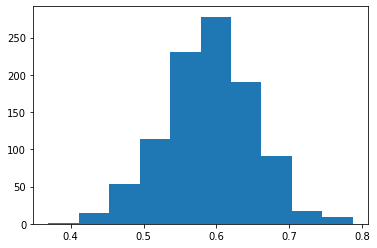

In [45]:
plt.hist(alphas)

<img src= "img/bootstrap1.png" style="height:400px">


### Bagging


Let's us one more time recall that if $Z_{1}, \cdots, Z_{n}$ are independent observations with variance $\sigma^{2}$ then the variance of the mean $\bar{Z}$ is given by $\frac{\sigma^{2}}{n}$. 

So what?

We will use this idea calculate $$ \hat{f}^{1}(x), \cdots, \hat{f}^{B}(x)$$ where each $\hat{f}^{i}$ represents a decision tree fitted to the bootstrapped data.


Then we will make a prediction by: 

$$ \hat{f}_{\text{avg}}(x) = \frac{1}{B}\sum_{b=1}^{B} \hat{f}^{b}(x)$$

Note that this is for regression and for the classification we can get majority vote.

__Problem__ We still have some problem with this approach and random forests will address this problem. Can you see the issue?

- If we have a strong predictor then this will dominate in each tree.





Bagging helps with high-variance. It is not necessary with linear regression, because linear regression has low variance and high bias.

In [46]:
import pandas as pd

In [54]:
## you can download the data from -- https://www.kaggle.com/ishaanv/ISLR-Auto#Heart.csv

## or http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
heart = pd.read_csv('data\Heart.csv')

In [55]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
Unnamed: 0    303 non-null int64
Age           303 non-null int64
Sex           303 non-null int64
ChestPain     303 non-null object
RestBP        303 non-null int64
Chol          303 non-null int64
Fbs           303 non-null int64
RestECG       303 non-null int64
MaxHR         303 non-null int64
ExAng         303 non-null int64
Oldpeak       303 non-null float64
Slope         303 non-null int64
Ca            299 non-null float64
Thal          301 non-null object
AHD           303 non-null object
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [56]:
heart.dropna(axis= 0, how= 'any', inplace = True)

y = heart.AHD

heart.drop(columns= 'AHD', inplace = True)

In [57]:
X = pd.get_dummies(heart)

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RandomForestClassifier()

In [60]:
rfc = RandomForestClassifier(n_estimators=300, max_features= 'sqrt', max_depth= 7,  oob_score=True)

In [61]:
from sklearn.model_selection import cross_validate

In [62]:
cv = cross_validate(rfc, X, y,return_estimator= True, cv = 5 )

In [63]:
cv['test_score']

array([0.81666667, 0.9       , 0.77966102, 0.79661017, 0.79661017])

In [64]:
est = cv['estimator'][3]

In [65]:
est.oob_score_

0.8319327731092437

In [66]:
est.feature_importances_

index = X.columns.tolist()

In [67]:
feat_imp = pd.DataFrame(est.feature_importances_, index = index, columns = ['importances'])

In [68]:
feat_imp.sort_values(by = 'importances', ascending = False)

,importances
Thal_normal,0.121308
Ca,0.112431
Oldpeak,0.100405
Thal_reversable,0.085313
ChestPain_asymptomatic,0.084279
MaxHR,0.078986
Age,0.075522
RestBP,0.063471
Unnamed: 0,0.058992
Chol,0.056464


### Extra Material 

- [On the variance](https://newonlinecourses.science.psu.edu/stat414/node/167/)

- [Discussion on Random Forests and overfitting](https://en.wikipedia.org/wiki/Talk%3ARandom_forest)

- [Tricky stuff with respect to feature importance](http://rnowling.github.io/machine/learning/2015/08/10/random-forest-bias.html)

- [ISLR - section 8.2](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)